# Clinical Study Overview

### Update database

In [1]:
from src.process_bucket import main
main()

Listing files chunks from AWS bucket: 33it [00:10,  3.20it/s]                      
Adding new files to database: 100%|██████████| 588/588 [00:00<00:00, 788.38it/s]



Command output: File copied from container to EC2 instance successfully.
File downloaded to local machine successfully.



Extracting raw data: 100%|██████████| 588/588 [00:50<00:00, 11.76it/s]


Arranging data ... Done!


Acquiring sessions: 100%|██████████| 768/768 [00:11<00:00, 69.45it/s] 


Completed!


### Create plots

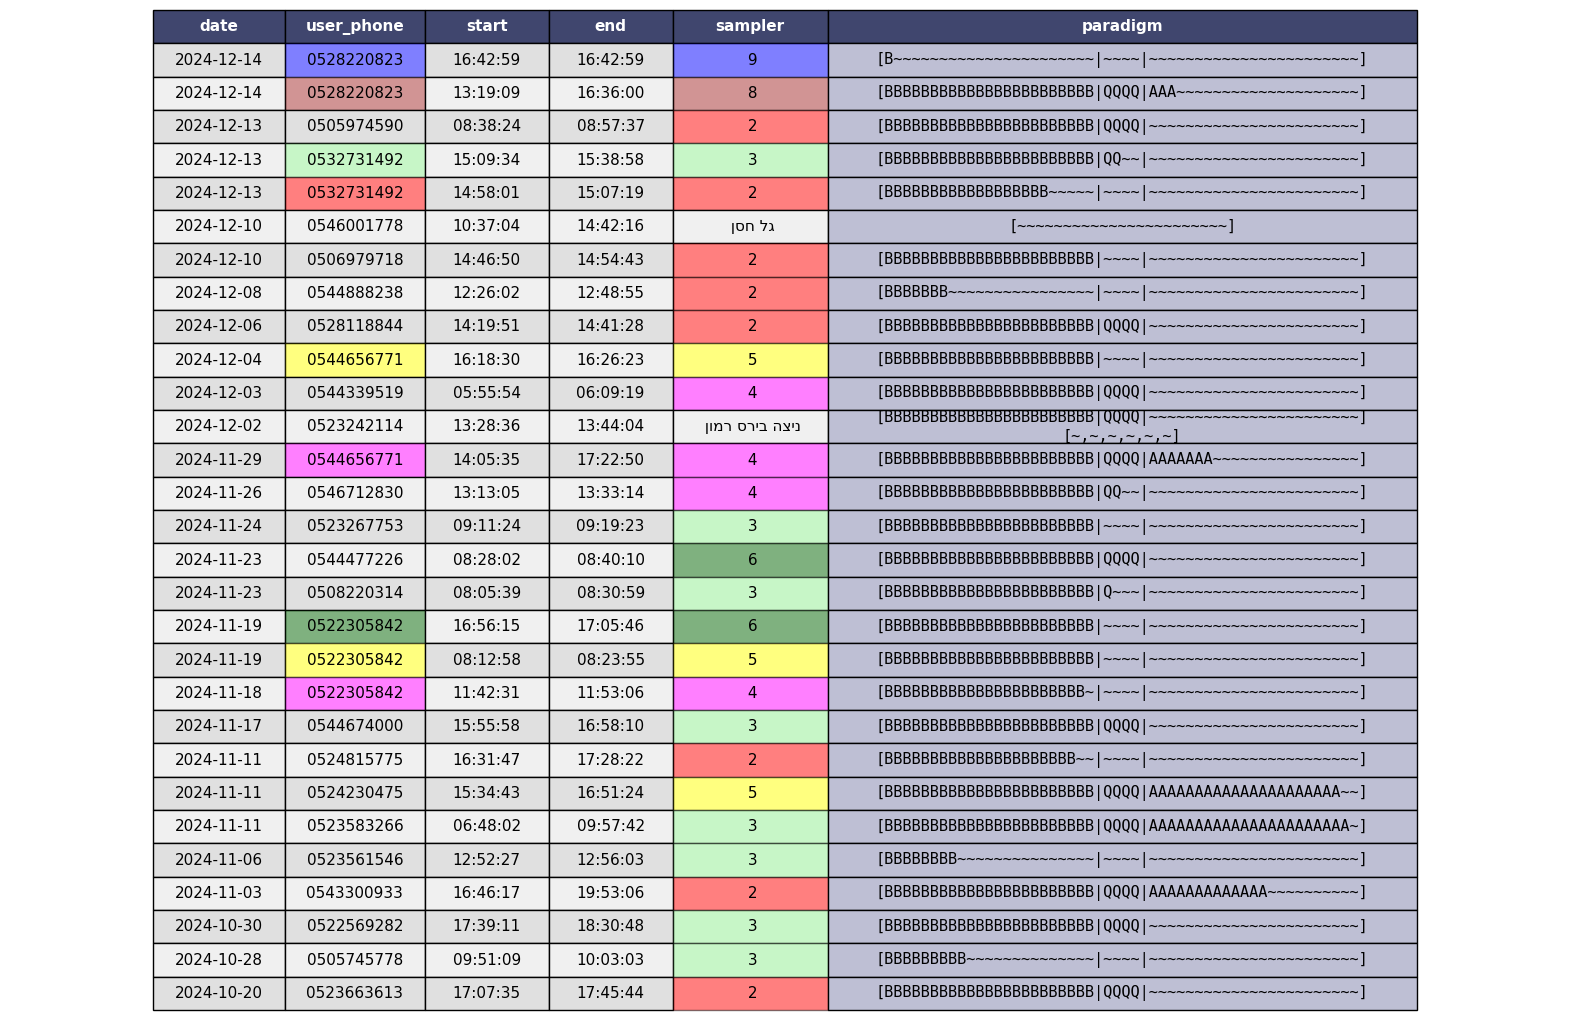

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from src.settings import Settings
%matplotlib inline

from src.plotting import plot_pies, plot_users_over_time, users_per_sampler, plot_sessions_count, plot_dataframe_table, broken_sessions, plot_histograms
# Suppress chained assignment warnings
pd.options.mode.chained_assignment = None  # default='warn'

show_AX = True

# fig1, ax1 = plot_pies(show_ax=show_AX, only_full=True)
# plt.show(fig1) 

# fig2, ax2 = plot_users_over_time(annotation_percentage=10, dropout=True, exclude_archive=True)
# plt.show(fig2) 

# fig3, ax3 = users_per_sampler(show='pika', exclude_archive=True, ignore=['s_hayabaron', 's_esterdas'])
# plt.show(fig3) 

# fig4, ax4 = plot_sessions_count(n=8, show_all=True)
# plt.show(fig4) 

# fig5, axes5 = plot_histograms(bins=[16, # UPDRS III
#                                     16, # UPDRS I,II,IV
#                                     14, # MoCA
#                                     16, # FOG
#                                     16, # SDQ
#                                     11, # WOQ
#                                     20, # PDQ8
# ]) 
# plt.show(fig5) 

fig6, ax6 = broken_sessions(only_sampler=False, ignore_sessions=True, fontsize=11, scale=(1, 2))
plt.show(fig6) 

# fig7, ax7 = plot_dataframe_table(source_file=Settings.SOURCE_CSV)
# plt.show(fig7) 


### Export images to pdf

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime

from src.settings import Settings
from src.plotting import plot_pies, plot_users_over_time, users_per_sampler, plot_sessions_count, plot_dataframe_table, plot_histograms, broken_sessions
# Suppress chained assignment warnings
pd.options.mode.chained_assignment = None  # default='warn'

current_datetime = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
pdf_filename = Settings.QUERY.format(datetime.now().strftime('%Y%m%d %H%M%S'))

show_AX = True

with PdfPages(pdf_filename) as pdf:
    # fig1, ax1 = plot_pies(show_ax=show_AX, only_full=True)
    # pdf.savefig(fig1)
    # plt.close(fig1)

    fig2, ax2 = plot_users_over_time(annotation_percentage=10, dropout=True, exclude_archive=True)
    pdf.savefig(fig2)
    plt.close(fig2)

    # fig3, ax3 = users_per_sampler(show='pika', exclude_archive=True, ignore=['s_hayabaron', 's_esterdas'])
    # pdf.savefig(fig3)
    # plt.close(fig3)

    # fig4, ax4 = plot_sessions_count(n=5, show_all=True)
    # pdf.savefig(fig4)
    # plt.close(fig4)

    # fig5, axes5 = plot_histograms(bins=[12, # UPDRS III
    #                                 16, # UPDRS I,II,IV
    #                                 14, # MoCA
    #                                 16, # FOG
    #                                 16, # SDQ
    #                                 11, # WOQ
    #                                 20, # PDQ8
    # ]) 
    # pdf.savefig(fig5)
    # plt.close(fig5)

    fig6, ax6 = broken_sessions(only_sampler=False, ignore_sessions=True, figsize=(20,20), scale=(1,2))
    pdf.savefig(fig6)
    plt.close(fig6)

    fig7, ax7 = plot_dataframe_table(source_file=Settings.SOURCE_CSV, figsize=(20, 40))
    pdf.savefig(fig7)
    plt.close(fig7)

    fig0, ax0 = plt.subplots(figsize=(8.27, 11.69))  # A4 size
    ax0.text(0.5, 0.5, f'Report generated on {current_datetime}', horizontalalignment='center', verticalalignment='center', fontsize=24)
    ax0.axis('off')
    pdf.savefig(fig0)
    plt.close(fig0)

print(f"PDF saved to {pdf_filename}")

PDF saved to results/queries/plots_20241215 120359.pdf


# User Manager

### Send recording reminder
Use carefully! Send no more than once a week.

##### (With link)

In [ ]:
# import pandas as pd
# from src.settings import Settings
# from src.send import send_recording_notification


# df = pd.read_csv(Settings.SEND_PASSWORDS, dtype=str)
# for ii,row in df.iterrows():
#     if row['send?']=='1':
#         send_recording_notification(destination_phone_number=row['user_phone'],
#                                     username=row['user_phone'][4:],
#                                     password=row['password'])

# send_recording_notification(destination_phone_number='+9720542050599', username='XXX', password="XXX")
# send_recording_notification(destination_phone_number='+9720549776075', username='XXX', password="XXX")


##### Without link

In [1]:
import pandas as pd
from src.settings import Settings
from src.send import send_recording_notification_without_link


df = pd.read_csv(Settings.SEND_PASSWORDS, dtype=str)
for ii,row in df.iterrows():
    if row['SMS']=='1':
        send_recording_notification_without_link(destination_phone_number=row['user_phone'])

send_recording_notification_without_link(destination_phone_number='+9720542050599')
send_recording_notification_without_link(destination_phone_number='+9720549776075')
send_recording_notification_without_link(destination_phone_number='+9720532752715')


Recording Notification Message sent to +9720545327131 with SID: MMbd5fffe76bfc2e2370eb0656a4d7ee8c
Recording Notification Message sent to +9720503006644 with SID: MM0d868f3800e62544b0896676bf1fa7a7
Recording Notification Message sent to +9720526877576 with SID: MMd46a965401d2a9f0cebf65feae1d99dc
Recording Notification Message sent to +9720544836277 with SID: MMd473b7d9f257180af2f622178b0eb3e9
Recording Notification Message sent to +9720505282670 with SID: MM166bf4027f09b75360d1f719933d8913
Recording Notification Message sent to +9720522544505 with SID: MM8f9b10d501c9e5746af1269bc0bfa93a
Recording Notification Message sent to +9720548181082 with SID: MM2f7edde7441f70dd86116bb7c629e772
Recording Notification Message sent to +9720544975750 with SID: MM8f68d3e6e0f61c704242757dbac36bd6
Recording Notification Message sent to +9720503220209 with SID: MM81dcbd962a51cf6c1ff80cdad8807186
Recording Notification Message sent to +9720509028234 with SID: MMf8862fe18f956c8a0800fd0e53518816
Recording 

### Send Details Request Form to healthy participants
Add the new users to the list and run!

### Patients with low MoCA

In [2]:
import pandas as pd
from src.settings import Settings

THRESHOLD = 20

df = pd.read_csv(Settings.QNNRS, dtype=str)
phones = pd.read_csv(Settings.USERS_CSV, dtype=str, usecols=['username', 'sampler_username', 'user_phone'])

df = df[(df['exercise']=='moca')]
df['score'] = df['score'].astype(int)
df = df.loc[df['score']<THRESHOLD, ['username', 'score']]
df = pd.merge(df, phones, how='left', on='username')
df = df.dropna(subset=['sampler_username'])
df

FileNotFoundError: [Errno 2] No such file or directory: 'results/csv/questionnaires.csv'

### Patients with high SDQ

In [4]:
import pandas as pd
from src.settings import Settings

THRESHOLD = 11

df = pd.read_csv(Settings.QNNRS, dtype=str)
phones = pd.read_csv(Settings.USERS_CSV, dtype=str, usecols=['username', 'user_phone'])

df = df[(df['exercise']=='sdq')]
df['score'] = df['score'].astype(float)
df = df.loc[df['score']>THRESHOLD, ['date', 'username', 'sampler_username', 'score']]
df = pd.merge(df, phones, how='left', on='username')
df.replace(pd.NA, '')#.sort_values(by=['username', 'score'], ascending=False)
df[~pd.isna(df.sampler_username)]

,date,username,sampler_username,score,user_phone
0,2024-06-19,09969aa7d3746299eb42bbd8c9a41508f360f262,s_miriamber,16.5,+9720528393452
1,2024-06-10,2a8c7887a187bfaae94f961a269c2b86e94909d4,s_nadiayiz,27.5,+9720547377029
2,2024-06-19,2cc56ded9250c3afda5e95db5e5998f36a9f4ac1,s_nitzaramon,12.5,+9720508869911
3,2024-06-25,44bb50fcd57760dff459e9297dda9a99fe442d08,s_miriamber,22.5,+9720505282670
4,2024-06-19,564f38559f0dc71afa7f055d1f816a9f88b7c445,s_miriamber,11.5,+9720528023568
5,2024-05-16,6adb9ad6636a73b9501599b2e53b7649654268a7,s_hayabaron,14.5,+9720549492941
7,2024-06-06,6de143adb5df63670064f42a737b84616e618c2a,s_miriamber,24.5,+9720544868042
9,2024-05-16,7de4a7fe141dfd869ccf884e2bfdf370ce10ce2f,s_ilyazlat,14.5,+9720543334371
11,2024-05-29,b01d43ffd43e885a2fb1f682ba121ab13c944d6e,s_miriamber,21.5,+9720524568598
13,2024-07-29,bc9f32faeb87d3a7fb86f432992736a3065e1d13,s_nitzaramon,11.5,+9720505745778
